<a href="https://colab.research.google.com/github/Brijeshtanwar/Topic-Modeling/blob/main/word_vectorizer_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# NLP libraries
import nltk
import re
# nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
oversample = RandomOverSampler(sampling_strategy='minority')

In [69]:
import spacy.cli

In [56]:
url = r"""https://raw.githubusercontent.com/Brijeshtanwar/Topic-Modeling/main/voc_data.csv"""
df = pd.read_csv(url, encoding = 'unicode_escape')

In [57]:
df = df[['CUSTOMER COMMENT', 'Reason']]
df.columns = ['x', 'y']

In [58]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [59]:
# Drop na 
df.dropna(axis=0, inplace=True)

In [60]:
df.y.value_counts()

Service                      1570
APPLICATION (WEB/APP)        1074
SERVICE                       335
CHARGES(BRO./DP/LPC ETC.)     332
Others                        321
NOT SPECIFIED                 254
Not Specified                 216
People                        113
Process                        69
PEOPLE                         32
Product                        13
PROCESS                         6
Name: y, dtype: int64

In [61]:
df['y'] = df['y'].str.lower()
df.loc[df['y']=='not specified', 'y'] = 'others'

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='count', ylabel='y'>

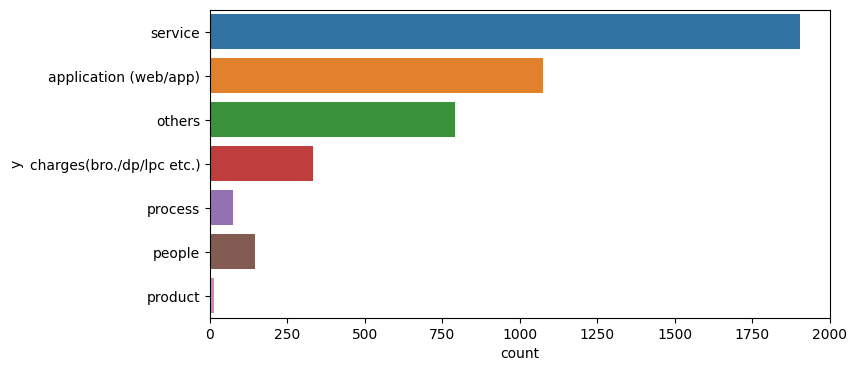

In [62]:
plt.figure(figsize=[8,4])
sns.countplot(y=df['y'])

In [63]:
# Preprocessing

In [64]:
# Remove integer comments
df = df[df['x'].apply(lambda x: not isinstance(x, int))]
df.reset_index(drop=True, inplace=True)

#lower case
df['x'] = df['x'].str.lower()

# Keep only alphabets
def cleaner(text):
    text = re.sub("[^A-Za-z]+", ' ', text)
    return text

In [65]:
df['x'] = df['x'].apply(cleaner)

In [66]:
# vector

In [ ]:
nlp = spacy.cli.download("en_core_web_lg")
df['vector'] = df['x'].apply(lambda x : nlp(x).vector)

In [ ]:
# Dict for classes
df['category_id'] = df['y'].factorize()[0]
category_id_df = df[['y', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'y']].values)

In [ ]:
df.head(3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df.index, test_size=0.33, stratify=y, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
X = features
y = labels

In [39]:
features.shape

(4335, 665)

<Axes: >

Text(33.222222222222214, 0.5, 'Actual')

Text(0.5, 25.722222222222214, 'Predicted')

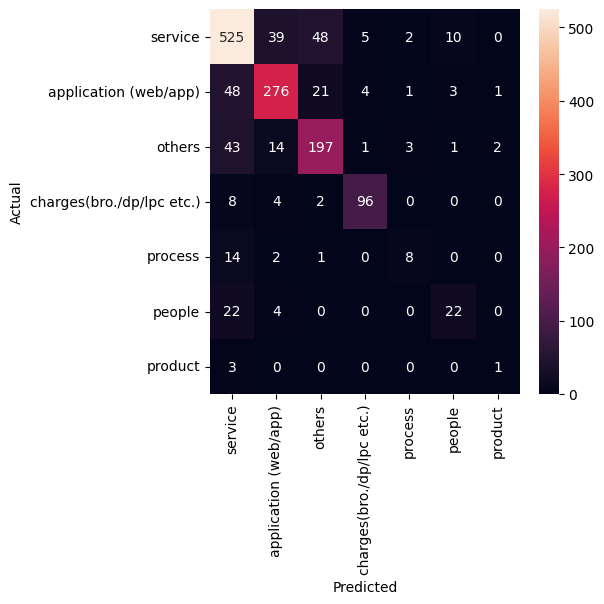

In [43]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.y.values, yticklabels=category_id_df.y.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
y_pred_overall = model.predict(X)

<Axes: >

Text(33.222222222222214, 0.5, 'Actual')

Text(0.5, 25.722222222222214, 'Predicted')

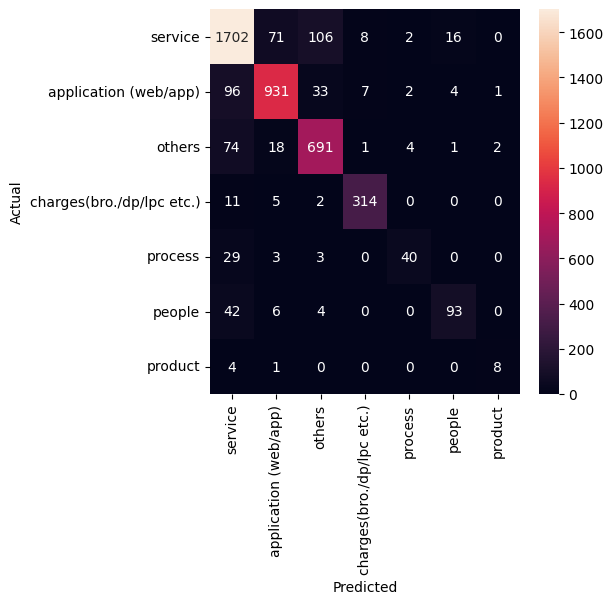

In [45]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred_overall)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.y.values, yticklabels=category_id_df.y.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
# To manually verify why some failed
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['y', 'x']])
            print('')

'application (web/app)' predicted as 'service' : 96 examples.


,y,x
1027,application (web/app),very bad xpiriunos ledger is not easy very con...
2720,application (web/app),prompt and healthy guide line should be prefer...
756,application (web/app),simplify kotak appvery complicated interface g...
3638,application (web/app),api querries not resolved equity shorted aucti...
3271,application (web/app),please solve the issue of api integration with...
1053,application (web/app),improve your kotak new app and your service
1981,application (web/app),suggestions made before i didnt see improvemen...
1475,application (web/app),jab trading account open kiya tha tab jo charg...
1486,application (web/app),no proper trading software no charting tools n...
1669,application (web/app),direct debit from kotak savings a c to trading...



'others' predicted as 'service' : 74 examples.


,y,x
987,others,worst experience ever
748,others,nice query
641,others,time
2140,others,time
60,others,not called
2284,others,the employees are good
3332,others,no it was the biggest mistake to start broking...
1357,others,please solve my issue frustrated customer
3757,others,worst experience i had ever faced in my whole ...
3425,others,all in all very pathetic experience for issues...



'charges(bro./dp/lpc etc.)' predicted as 'service' : 11 examples.


,y,x
2776,charges(bro./dp/lpc etc.),a long pending issue regarding levying of dema...
3181,charges(bro./dp/lpc etc.),follow up mail dt sir very sorry to note that ...
667,charges(bro./dp/lpc etc.),as and when there are changes in interest or a...
3274,charges(bro./dp/lpc etc.),very bad experience please refund my all extra...
4124,charges(bro./dp/lpc etc.),i have been asking for reduction of brokerage ...
4066,charges(bro./dp/lpc etc.),dear team i have already sent mail to kotak se...
692,charges(bro./dp/lpc etc.),loot by you of account holder very high charge...
2191,charges(bro./dp/lpc etc.),loot by you of account holder very high charge...



'process' predicted as 'service' : 29 examples.


,y,x
4245,process,we have asked for our financial statement and ...
806,process,registered one person for family members secur...
3378,process,employee need to be trained on processes empl...
2331,process,the customer should be assisted with bank pers...
2921,process,you are requested to text message dailytrading...
3012,process,the securities are auctioned without any intim...
2930,process,need to improve the customer complaint redress...
2999,process,my trading account is debited by rs on without...
1079,process,please do not tell lies and only give one answ...
405,process,i have been requesting for bank modification i...



'people' predicted as 'service' : 42 examples.


,y,x
4273,people,kotak securities people does not take initiati...
3606,people,first of all client will call any time during ...
2394,people,you need to improve your system and your porta...
42,people,awful support
890,people,allotted rm wont respond the calls and lack of...
4269,people,toll free numbers are not answering many time ...
4033,people,all the customer care executives are with insu...
131,people,please improve your support
416,people,we should be provided with advice on shares th...
1340,people,some junior employee with no knowledge and exp...



'service' predicted as 'application (web/app)' : 71 examples.


,y,x
1373,service,previously warned not call during stocks marke...
1281,service,better dealer availability authorization to th...
2873,service,all your relationship managers whatsapp call a...
3243,service,overall highly discouragingbengaluru vijayanag...
3348,service,recommend good and quality productskindly give...
1810,service,i think kotak team is worst including your ceo...
1765,service,please improve your app and also focus on redr...
3836,service,at some specific points human involvement shou...
2305,service,need complete bond both bse and nse with ytm a...
72,service,calls not picked up at all no updates about te...



'others' predicted as 'application (web/app)' : 18 examples.


,y,x
4302,others,when searching for instrument it not displayin...
2805,others,no problem please update
3224,others,hang problem
384,others,i received a info about hdfc life insurance sh...
4197,others,very much hang big loss kindly make it fixed
1472,others,do better
383,others,i received a info about hdfc life insurance sh...
1882,others,i received a info about hdfc life insurance sh...
4149,others,make it more trader friendly its money at stak...
1473,others,toll free no is not working always try to improve



'people' predicted as 'application (web/app)' : 6 examples.


,y,x
264,people,not expected this kind of call support and app...
1763,people,not expected this kind of call support and app...
2680,people,no knowledge they make my too much loss in opt...
3930,people,knowledgeable deler hone chahiyeor unko kotak ...



'service' predicted as 'others' : 106 examples.


,y,x
371,service,please dont call me with any recommendations t...
1873,service,acha nahi smjhaya apka admi
3352,service,no new trading flatform work properly your old...
3072,service,zero satisfaction no ownership by any one all ...
3250,service,no comments
3444,service,no accountability no ownership
3501,service,please ensure call back
1542,service,no one can receive my cell
1346,service,let someone call me i will explain the issue i...
2571,service,first inform there after decision



'application (web/app)' predicted as 'others' : 33 examples.


,y,x
4171,application (web/app),not able to locate demat account in the ap
649,application (web/app),it is observed you are not quick in returning ...
826,application (web/app),my account report not good just like profit an...
2266,application (web/app),very old platform needs a total overhauling
514,application (web/app),activation of segments has become a pain seems...
767,application (web/app),very old platform needs a total overhauling
3263,application (web/app),worst ui its just coz options is free i am usi...
2434,application (web/app),what statement requirements to be sent as soon...
2148,application (web/app),it is observed you are not quick in returning ...
2977,application (web/app),allover good but mobile not work properly



'service' predicted as 'charges(bro./dp/lpc etc.)' : 8 examples.


,y,x
1498,service,querries where kotak is at disadvantageous pos...
2525,service,dealers acha hona or charges hidden nai lagana...
2531,service,bank charges on transactions are very high deb...
0,service,querries where kotak is at disadvantageous pos...
3279,service,whenever call everytime new person he she has ...



'application (web/app)' predicted as 'charges(bro./dp/lpc etc.)' : 7 examples.


,y,x
2577,application (web/app),suggestions a make kotak equity delivery segme...
433,application (web/app),your charges of holding the sahre is very vry ...
1932,application (web/app),your charges of holding the sahre is very vry ...
1256,application (web/app),kotak neo is very stuck and hanging mobile and...



'service' predicted as 'people' : 16 examples.


,y,x
2025,service,not have the knowledge on subject matter and n...
766,service,is very high it should be negative as ur staf...
3848,service,some stock not performed
3231,service,talk properly with any tamil executive
2879,service,dear sirs we have a pending issue we wanted to...
3412,service,not directly contact to broker like other trad...
1699,service,i am recommending because advisors are too slo...
166,service,sack your hr head for employing lazy people ma...
200,service,i am recommending because advisors are too slo...
2265,service,is very high it should be negative as ur staf...


In [47]:
# Classification report
from sklearn import metrics
print(metrics.classification_report(y, y_pred_overall, target_names=df['y'].unique()))

                           precision    recall  f1-score   support

                  service       0.87      0.89      0.88      1905
    application (web/app)       0.90      0.87      0.88      1074
                   others       0.82      0.87      0.85       791
charges(bro./dp/lpc etc.)       0.95      0.95      0.95       332
                  process       0.83      0.53      0.65        75
                   people       0.82      0.64      0.72       145
                  product       0.73      0.62      0.67        13

                 accuracy                           0.87      4335
                macro avg       0.85      0.77      0.80      4335
             weighted avg       0.87      0.87      0.87      4335

